In [1]:
import os
import pandas as pd
import datetime
from sqlalchemy import *
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import login_mysql
mydb, cursor = login_mysql.login()

### 1. 브리핑

In [2]:
# 채널별별 구독자수 현황 및 증감

In [3]:
qry1 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry1)
rlt1 = cursor.fetchall()

rlt1 = pd.DataFrame(rlt1)


In [4]:
qry2 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry2)
rlt2 = cursor.fetchall()

rlt2 = pd.DataFrame(rlt2)

#### 1) 인플루언서채널 구독자 현황

In [5]:
rlt1
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,MOCAR,2021-06-11,569000,566000,3000
1,MOTline,2021-06-11,474000,472000,2000
2,자동차의모든것,2021-06-11,256000,254000,2000
3,Auto View,2021-06-11,213000,212000,1000
4,NOBOSSINDUSTRY,2021-06-11,236000,235000,1000
5,Woopa TV,2021-06-11,626000,625000,1000
6,CARLAB,2021-06-11,67600,67400,200
7,Auto Press,2021-06-11,175000,175000,0
8,Motograph,2021-06-11,350000,350000,0


- 6월11일자는 크롤링 결과 이전일(6월4일) 대비 구독자수 3천명 증가
- 내가 구독하고 있는 인플루언서 채널 중 MOCAR, MOTline, 자동차의 모든것 등의 구독자수 증가
- 가장 구독자가 많은 채널이 아닌데 왜 늘었을까?

In [6]:
rlt2
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,Jeep,2021-06-11,16000,15700,300
1,renaultsamsungM,2021-06-11,11000,10800,200
2,BMW,2021-06-11,31700,31600,100
3,TOYOTA,2021-06-11,11300,11200,100
4,VOLVO,2021-06-11,2080,2070,10
5,FORD,2021-06-11,413,412,1
6,KIA,2021-06-11,128000,128000,0
7,LEXUS,2021-06-11,10400,10400,0
8,HYUNDAI,2021-06-11,0,0,0
9,Mercedes-Benz,2021-06-11,1650000,1650000,0


- 브랜드채널의 경우 지프, 르노삼성, BMW의 구독자 증가가 눈에 보임

In [7]:
# 채널별별 조회수 현황 및 증감

In [8]:
qry3 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry3)
rlt3 = cursor.fetchall()

rlt3 = pd.DataFrame(rlt3)

In [9]:
qry4 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry4)
rlt4 = cursor.fetchall()

rlt4 = pd.DataFrame(rlt4)

In [10]:
rlt3
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,MOTline,2021-06-11,156866993,154191416,2675577
1,MOCAR,2021-06-11,238264656,235950897,2313759
2,Woopa TV,2021-06-11,313286045,311512442,1773603
3,NOBOSSINDUSTRY,2021-06-11,83913203,83413932,499271
4,Auto View,2021-06-11,65870901,65453251,417650
5,자동차의모든것,2021-06-11,72302001,71899729,402272
6,Motograph,2021-06-11,226969072,226647622,321450
7,Auto Press,2021-06-11,120373129,120116941,256188
8,CARLAB,2021-06-11,36237015,36128532,108483


- 구독자는 MOCAR가 가장 많이 늘었지만, 조회수는 MOTline이 가장 많이 늘었음
- 기존 구독자수가 많은 WoopaTV가 조회수에는 3위를 기록함

In [11]:
rlt4
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,KIA,2021-06-11,376527633,374988464,1539169
1,renaultsamsungM,2021-06-11,68501696,67637366,864330
2,TOYOTA,2021-06-11,78535422,77849362,686060
3,Mercedes-Benz,2021-06-11,307851865,307284973,566892
4,LEXUS,2021-06-11,50598992,50240553,358439
5,SsangyongMotor,2021-06-11,67139514,66912255,227259
6,HYUNDAI,2021-06-11,265985471,265855103,130368
7,Jeep,2021-06-11,36617622,36546141,71481
8,FORD,2021-06-11,622395,614179,8216
9,BMW,2021-06-11,118527544,118521448,6096


- 브랜드 채널의 경우 광고를 통한 조회수 증가분이 큰 영역
- KIA, 르노삼성, TOYOTA, Benz, 렉서스, 쌍용, 현대자동차에서 10k이상의 조회수 증가분 있음
- 이들 광고주들이 현시점 광고 열심히 한다는 의미로 상황 파악 가능

In [12]:
# 채널별별 신규동영상 수 현황 및 증감

In [13]:
qry5 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry5)
rlt5 = cursor.fetchall()

rlt5 = pd.DataFrame(rlt5)

In [14]:
qry6 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry6)
rlt6 = cursor.fetchall()

rlt6 = pd.DataFrame(rlt6)

In [15]:
rlt5
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,MOTline,2021-06-11,736,726,10
1,MOCAR,2021-06-11,1067,1057,10
2,Woopa TV,2021-06-11,862,852,10
3,NOBOSSINDUSTRY,2021-06-11,843,835,8
4,CARLAB,2021-06-11,989,983,6
5,Auto Press,2021-06-11,1959,1956,3
6,Auto View,2021-06-11,450,447,3
7,Motograph,2021-06-11,1980,1977,3
8,자동차의모든것,2021-06-11,623,621,2


In [16]:
rlt6
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,TOYOTA,2021-06-11,309,301,8
1,HYUNDAI,2021-06-11,3040,3035,5
2,KIA,2021-06-11,1331,1328,3
3,Mercedes-Benz,2021-06-11,1945,1942,3
4,BMW,2021-06-11,170,169,1
5,LEXUS,2021-06-11,187,186,1
6,AUDI,2021-06-11,122,121,1
7,SsangyongMotor,2021-06-11,689,689,0
8,FORD,2021-06-11,37,37,0
9,VolkswagenKorea,2021-06-11,132,132,0


- 토요타, 현대차, 기아차, 벤츠까지 신규 영상등록하면서 광고시작한듯 보임

### 2. 브랜드별 채널현황

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = 'c:/Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [18]:
# 브랜드채널별 일별조회수 및 예상광고비

In [19]:
# Brand : TOYOTA

In [20]:
qry7 = """

SELECT
 c.Video_title 
 ,sum((c.views-c.prev_views)) as sum_views
 ,sum((c.views-c.prev_views) * 40) as ex_cost -- CPV : 40원적용
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'TOYOTA') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
GROUP BY c.Video_title
ORDER BY ex_cost DESC

"""
cursor.execute(qry7)
rlt7 = cursor.fetchall()

rlt7 = pd.DataFrame(rlt7)

In [21]:
rlt7 = rlt7.astype(
        {'Video_title' : str,
         'sum_views' : int,
         'ex_cost' : int     
        })

In [22]:
rlt7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video_title  45 non-null     object
 1   sum_views    45 non-null     int32 
 2   ex_cost      45 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 848.0+ bytes


In [23]:
rlt7[:9].sum()

Video_title    캠리 하이브리드 런칭(XLE Launching 15초 ver.)캠리 하이브리드 런칭...
sum_views                                                2279270
ex_cost                                                 91170800
dtype: object

- 토요타는 6월5일 이후 상기의 동영상에서 조회수를 기록 중임
- 토요타는 기간 중 총 8억상당의 광고비 투여하여 총 1,986,265 view 기록
- 캠리 하이브리드 XLS, XSE 광고로 약 130만views를 얻었음

Text(0, 0.5, '예상광고비')

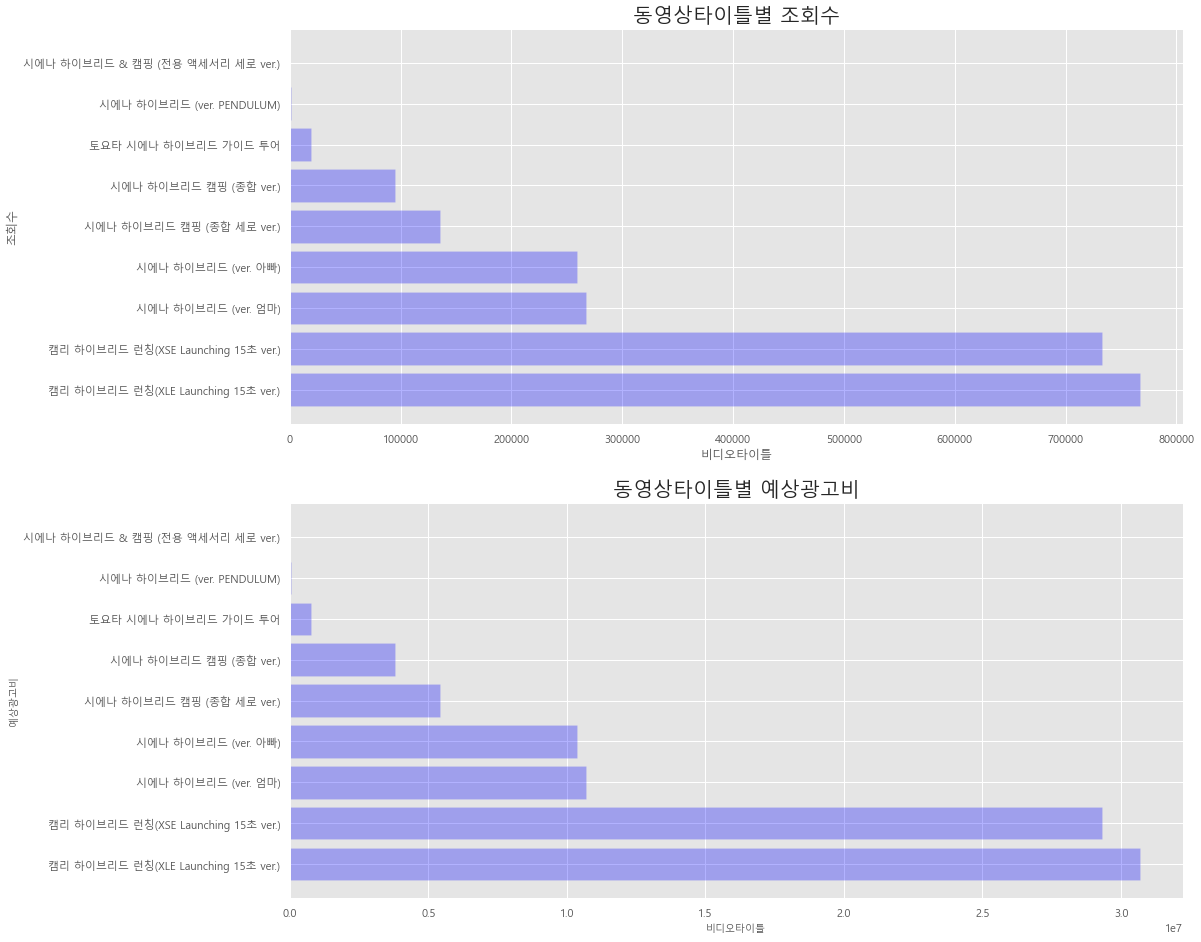

In [24]:
fig = plt.figure(figsize=(16,16))

plt.style.use('ggplot')
plt.subplot(2,1,1)
plt.barh(rlt7[:9]['Video_title'], rlt7[:9]['sum_views'], color='blue', alpha=0.3)
plt.title("동영상타이틀별 조회수",fontsize=20)
plt.xlabel('비디오타이틀')
plt.ylabel('조회수')

plt.subplot(2,1,2)
plt.barh(rlt7[:9]['Video_title'], rlt7[:9]['ex_cost'], color='blue', alpha=0.3)
plt.title("동영상타이틀별 예상광고비",fontsize=20)
plt.xlabel('비디오타이틀', fontsize=10)
plt.ylabel('예상광고비', fontsize=10)

In [25]:
# Brand = TOYOTA

In [156]:
qry8 = """
SELECT
 c.Video_title 
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'TOYOTA') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry8)
rlt8 = cursor.fetchall()

rlt8 = pd.DataFrame(rlt8)

In [157]:
rlt8.tail(1)

,Video_title,Pub_date,Channel_genre,Brand,Timestamp,views,dff_views,ex_cost,likes,dff_likes,dislikes,dff_dislikes,comments,dff_comments
1124,시즌 피니쉬! GR Supra with 2020 슈퍼레이스,2020-12-28,Brand,TOYOTA,2021-06-26,653,0,0,18,0,0,0,5,0


In [158]:
# 브랜드별 새로등록된 동영상

In [159]:
last_pub = rlt8["Pub_date"].unique()[0] # 최근게시일 / 토요타는 가장 최근 업로드 시점이 6월4일

In [160]:
last_date = rlt8['Timestamp'].unique()[-1] # 최근날짜  / 토요타채널의 가장 최근 크롤링 시점은 6월23일

In [161]:
# 최근 업로드된 동영상
rlt8[(rlt8["Pub_date"] == last_pub) & (rlt8["Timestamp"] == last_date)][["Video_title", "Pub_date", "views", "likes", "dislikes"]]

,Video_title,Pub_date,views,likes,dislikes
24,시에나 하이브리드 & 캠핑 (RSE 세로 ver.),2021-06-04,158,12,0
49,시에나 하이브리드 & 캠핑 (RSE),2021-06-04,275,11,0
74,시에나 하이브리드 & 캠핑 (전용 액세서리 세로 ver.),2021-06-04,657,17,0
99,시에나 하이브리드 & 캠핑 (전용 액세서리),2021-06-04,287,12,0
124,시에나 하이브리드 & 캠핑 (킥센서&파워백도어 세로 ver.),2021-06-04,175,13,0
149,시에나 하이브리드 & 캠핑 (킥센서&파워백도어),2021-06-04,131,8,0
174,시에나 하이브리드 캠핑 (종합 ver.),2021-06-04,95328,20,0
199,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-04,135880,17,2


In [162]:
# 동영상별 일별 조회수 추이

In [163]:
v_titles = rlt8['Video_title'].unique() # 2021년12월1일 이후 등록된 동영상타이틀

In [164]:
sum_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, #MakeYourMove I Australian Open I Kia to 확실한 블랙아이스 예방법 여기 다 있습니다! 이것만 보고 가세요!! [내차관리 팩트체크 12편]
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (dff_views, sum)  148 non-null    int64 
 1   (Video_title, )   148 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [165]:
# 동영상별 일별조회수 추이 / TOP 5

In [166]:
#최근 조횟수 TOP5
sum_titles = rlt8[["Video_title", "dff_views"]].groupby(['Video_title']).agg([np.sum])
sum_titles['Video_title'] = sum_titles.index
sum_titles['dff_views'].sort_values(by = 'sum', ascending=False)[0:5]

,sum
Video_title,
캠리 하이브리드 런칭(XLE Launching 15초 ver.),767261
캠리 하이브리드 런칭(XSE Launching 15초 ver.),733112
시에나 하이브리드 (ver. 엄마),267681
시에나 하이브리드 (ver. 아빠),259584
시에나 하이브리드 캠핑 (종합 세로 ver.),135732


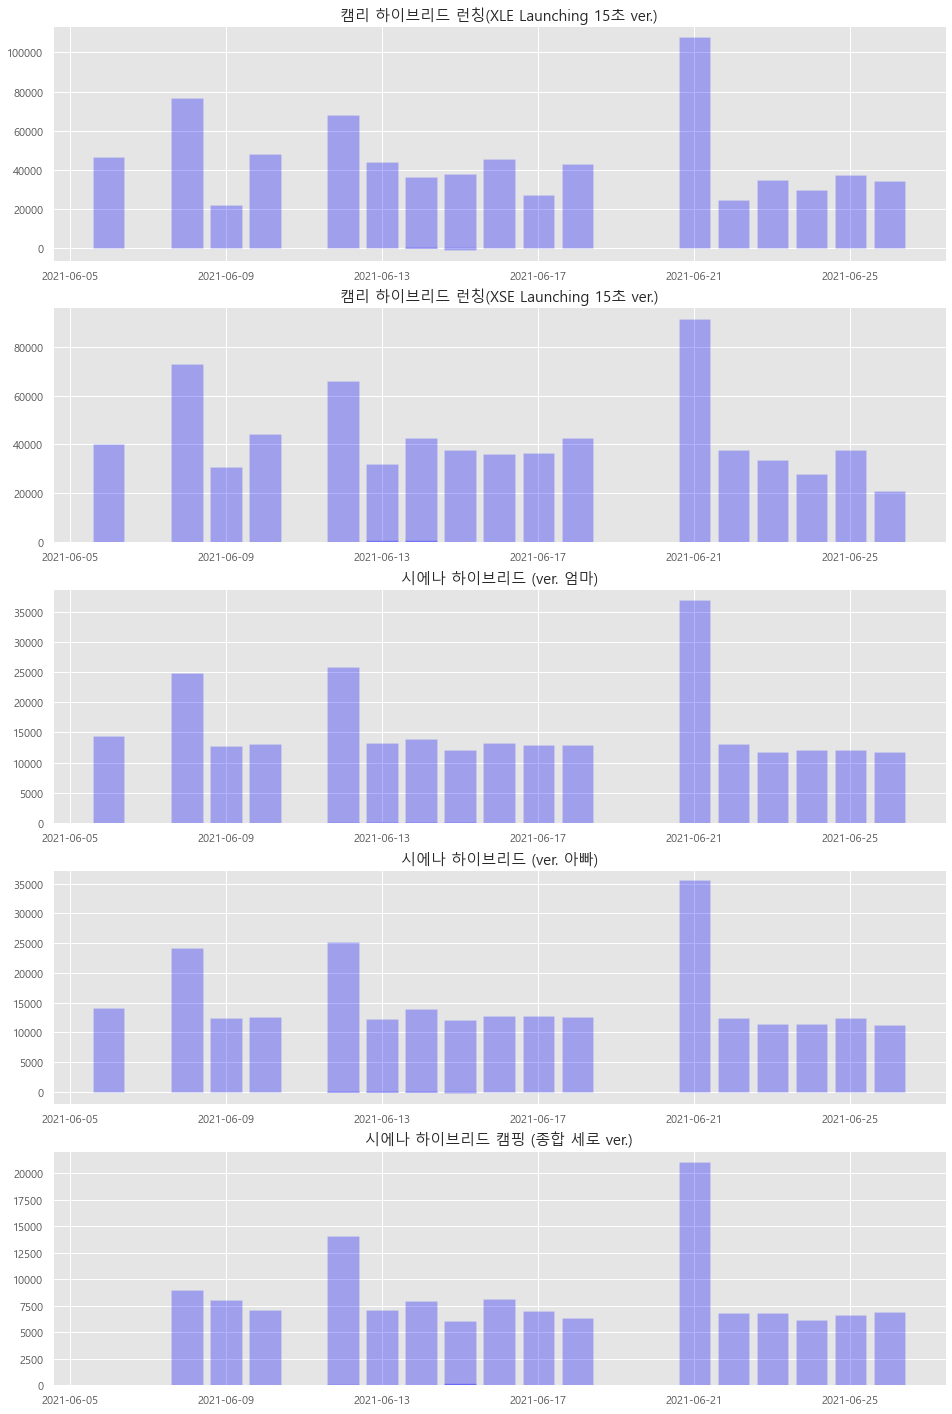

In [167]:
last_pub = rlt8["Pub_date"].unique()[0] # 최근게시일 / 토요타는 가장 최근 업로드 시점이 6월4일
last_date = rlt8['Timestamp'].unique()[-1] # 최근날짜  / 토요타채널의 가장 최근 크롤링 시점은 6월23일


# 조회수 상위5개 동영상 리스트
Video_list = sum_titles['dff_views'].sort_values(by = 'sum', ascending=False)[0:5].index 

rlt8[(rlt8["Pub_date"] == last_pub) & (rlt8["Timestamp"] == last_date)][["Video_title", "Pub_date", "views", "likes", "dislikes"]]

fig = plt.figure(figsize=(16,25))
plt.style.use('ggplot')
for i in range(0,len(Video_list)):
    v_title = rlt8[rlt8['Video_title'] == Video_list[i]][["Timestamp", 'views', 'dff_views']]
    plt.subplot(len(Video_list),1,i+1)
    plt.bar(v_title['Timestamp'], v_title['dff_views'], color='blue', alpha=0.3)
    plt.title(Video_list[i], fontsize=15)


In [38]:
# 브랜드동영상별 좋아요,싫어요 반응

### 3. 인플루언서 채널현황

In [7]:
# 연도/기간 별로 '타이틀' 분석 - 단어빈도

In [132]:
qry9 = """
SELECT
 c.Video_title 
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Channel_genre = 'Influencer') c
WHERE c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry9)
rlt9 = cursor.fetchall()

rlt9 = pd.DataFrame(rlt9)

In [133]:
rlt9.head(1)

,Video_title,Pub_date,Channel_genre,Brand,Timestamp,views,dff_views,ex_cost,likes,dff_likes,dislikes,dff_dislikes,comments,dff_comments
0,"카니발 디젤 VS 시에나 하이브리드...치열한 연비 대결의 승자는? ""카니발이 동네...",2021-06-04,Influencer,Motograph,2021-06-06,26341,10353,414120,265,70,15,8,103,29


In [134]:
Video = rlt9[["Video_title", 'Channel_genre', 'Pub_date', 'dff_views']].groupby(by=["Video_title","Channel_genre","Pub_date"], as_index=False).sum()

In [135]:
Video = Video.sort_values(by='dff_views', ascending=False)

In [136]:
text = Video['Video_title']

In [137]:
import nltk
from konlpy.tag import Okt

In [138]:
t = Okt()

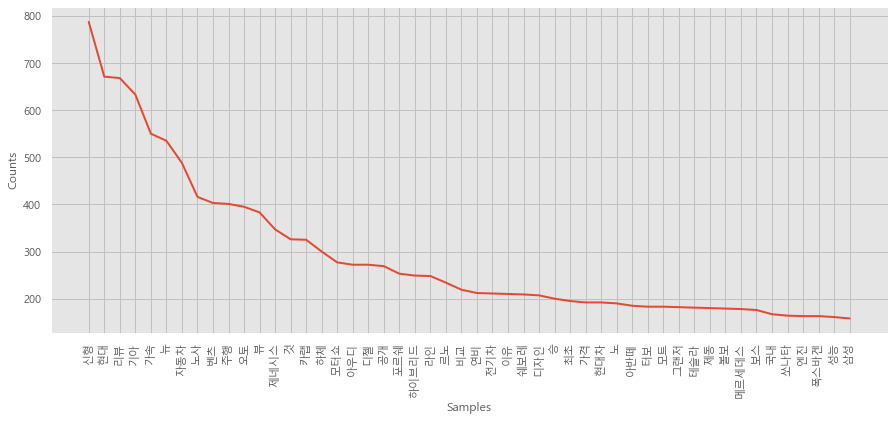

In [150]:
present_text = ''
for each_line in text:
    present_text = present_text + each_line + '\n'
ko = nltk.Text(tokens_ko, name='자동차리뷰분석')

tokens_ko = t.nouns(present_text)
tokens_ko

stop_words = ['승기', '이', '부', '편', '급', '더', '를', '거', '말', '의', '뭐', '알', '차', '닉']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='자동차리뷰분석')
ko.vocab().most_common()


plt.figure(figsize=(15,6))
ko.plot(50)
plt.show();

In [127]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

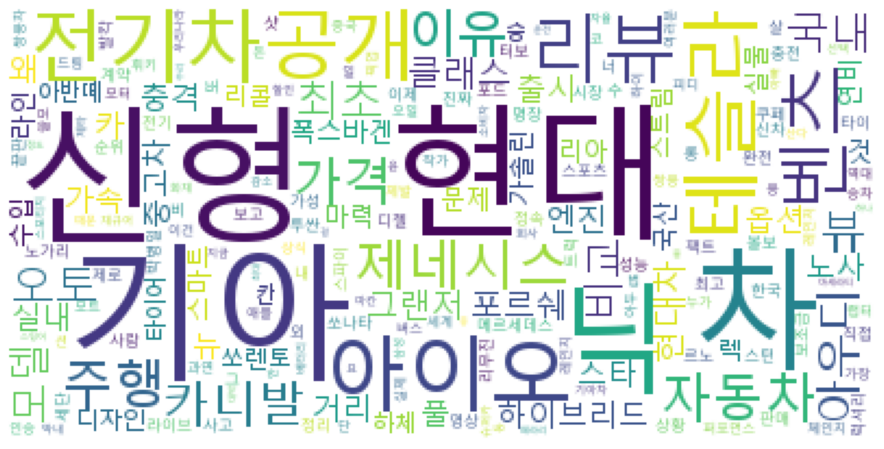

In [128]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path="C:\Windows\Fonts\Malgun.ttf",
                     relative_scaling = 0.5,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [109]:
# 댓글게재일 기준으로 단어빈도 --> 마케팅키워드를 찾기위해

In [ ]:
# 댓글기준 - 특정브랜드에 대한 긍정/부정 --> 현재 브랜드의 소비자반응을 알기 위해